# Multiple Linear Regression In Python

## Importing the needed packages

In [10]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importin the data to be used for the analysis

In [5]:
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

### Checking the structure of the data. Both the head and the tail of the data.

In [7]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
data.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


### Exploratory Data Analysis

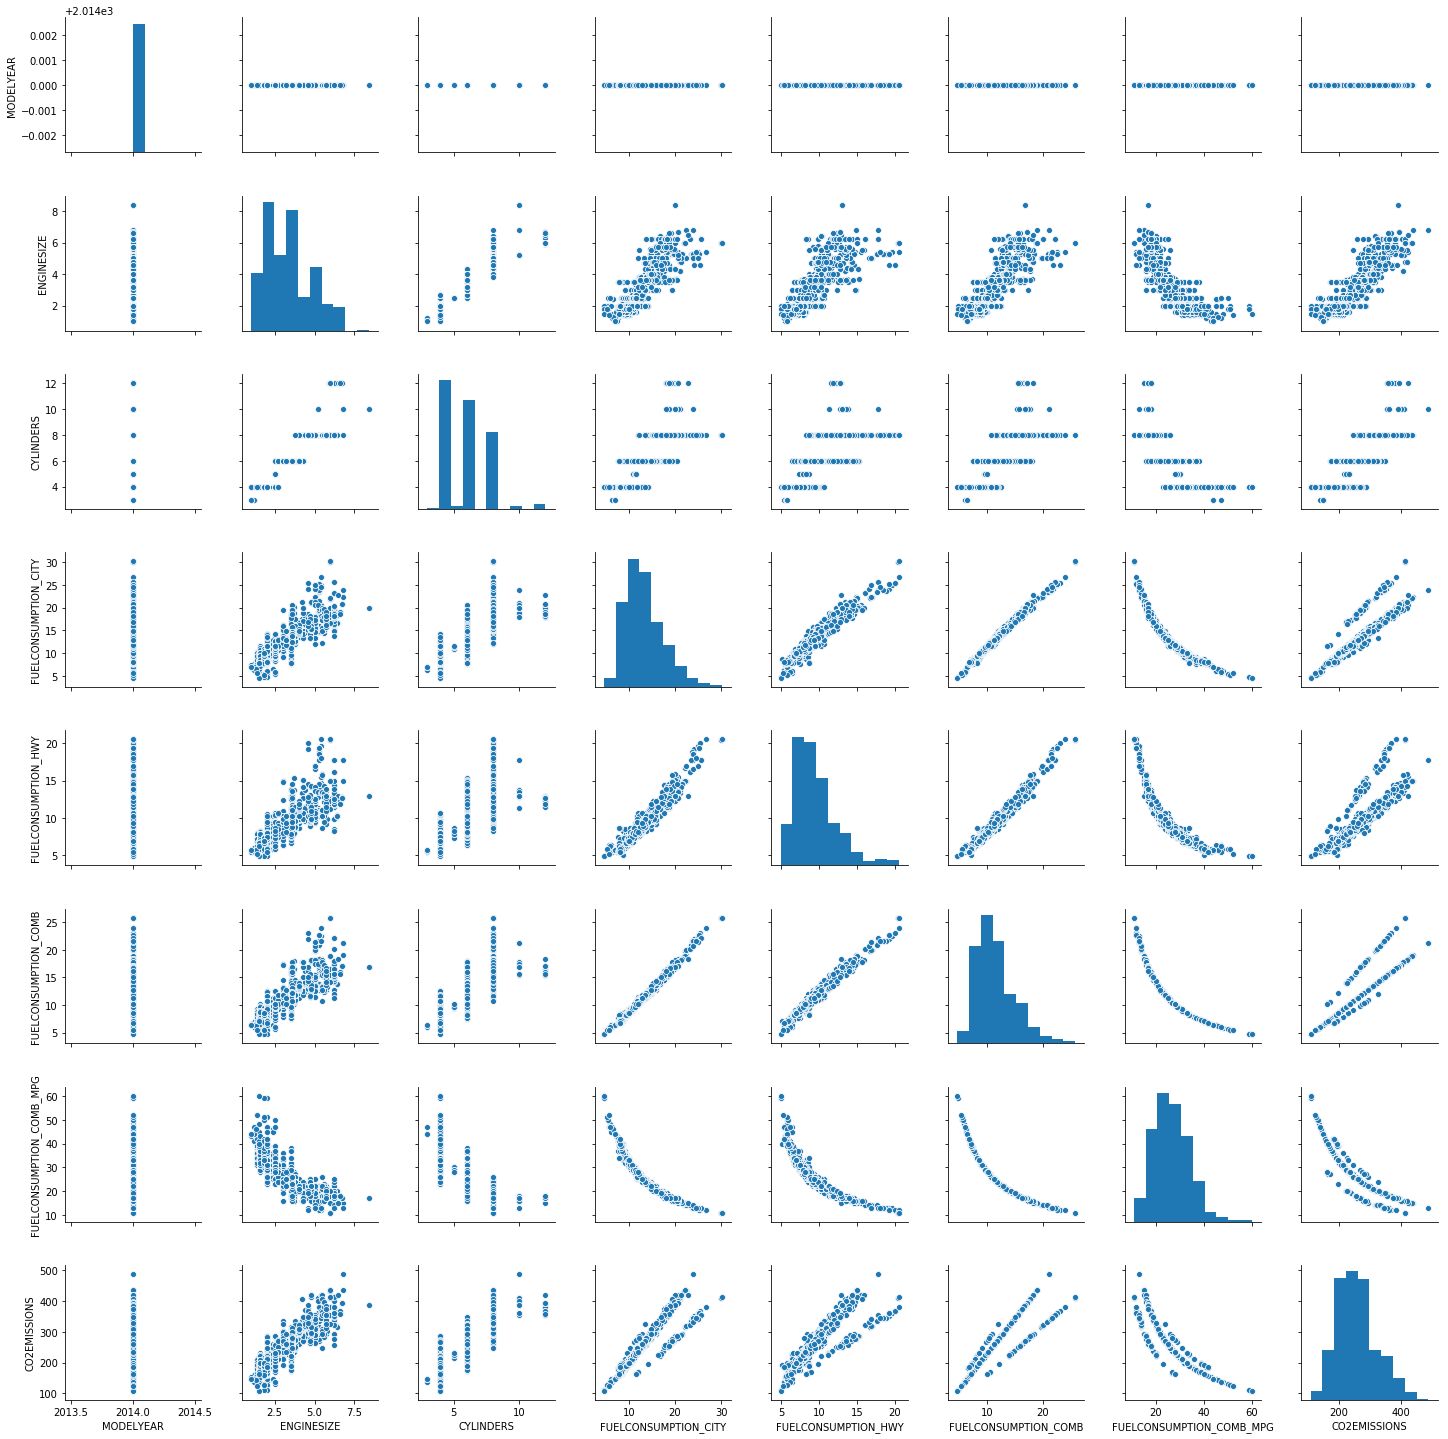

In [11]:
# Scatterplot of the data
sns.pairplot(data)

## Creating Train and Test Data

In [14]:
indextrain = np.random.rand(len(data))<0.7
traindata=data[indextrain]
testdata = data[~indextrain]

#### Scatterplot of the data

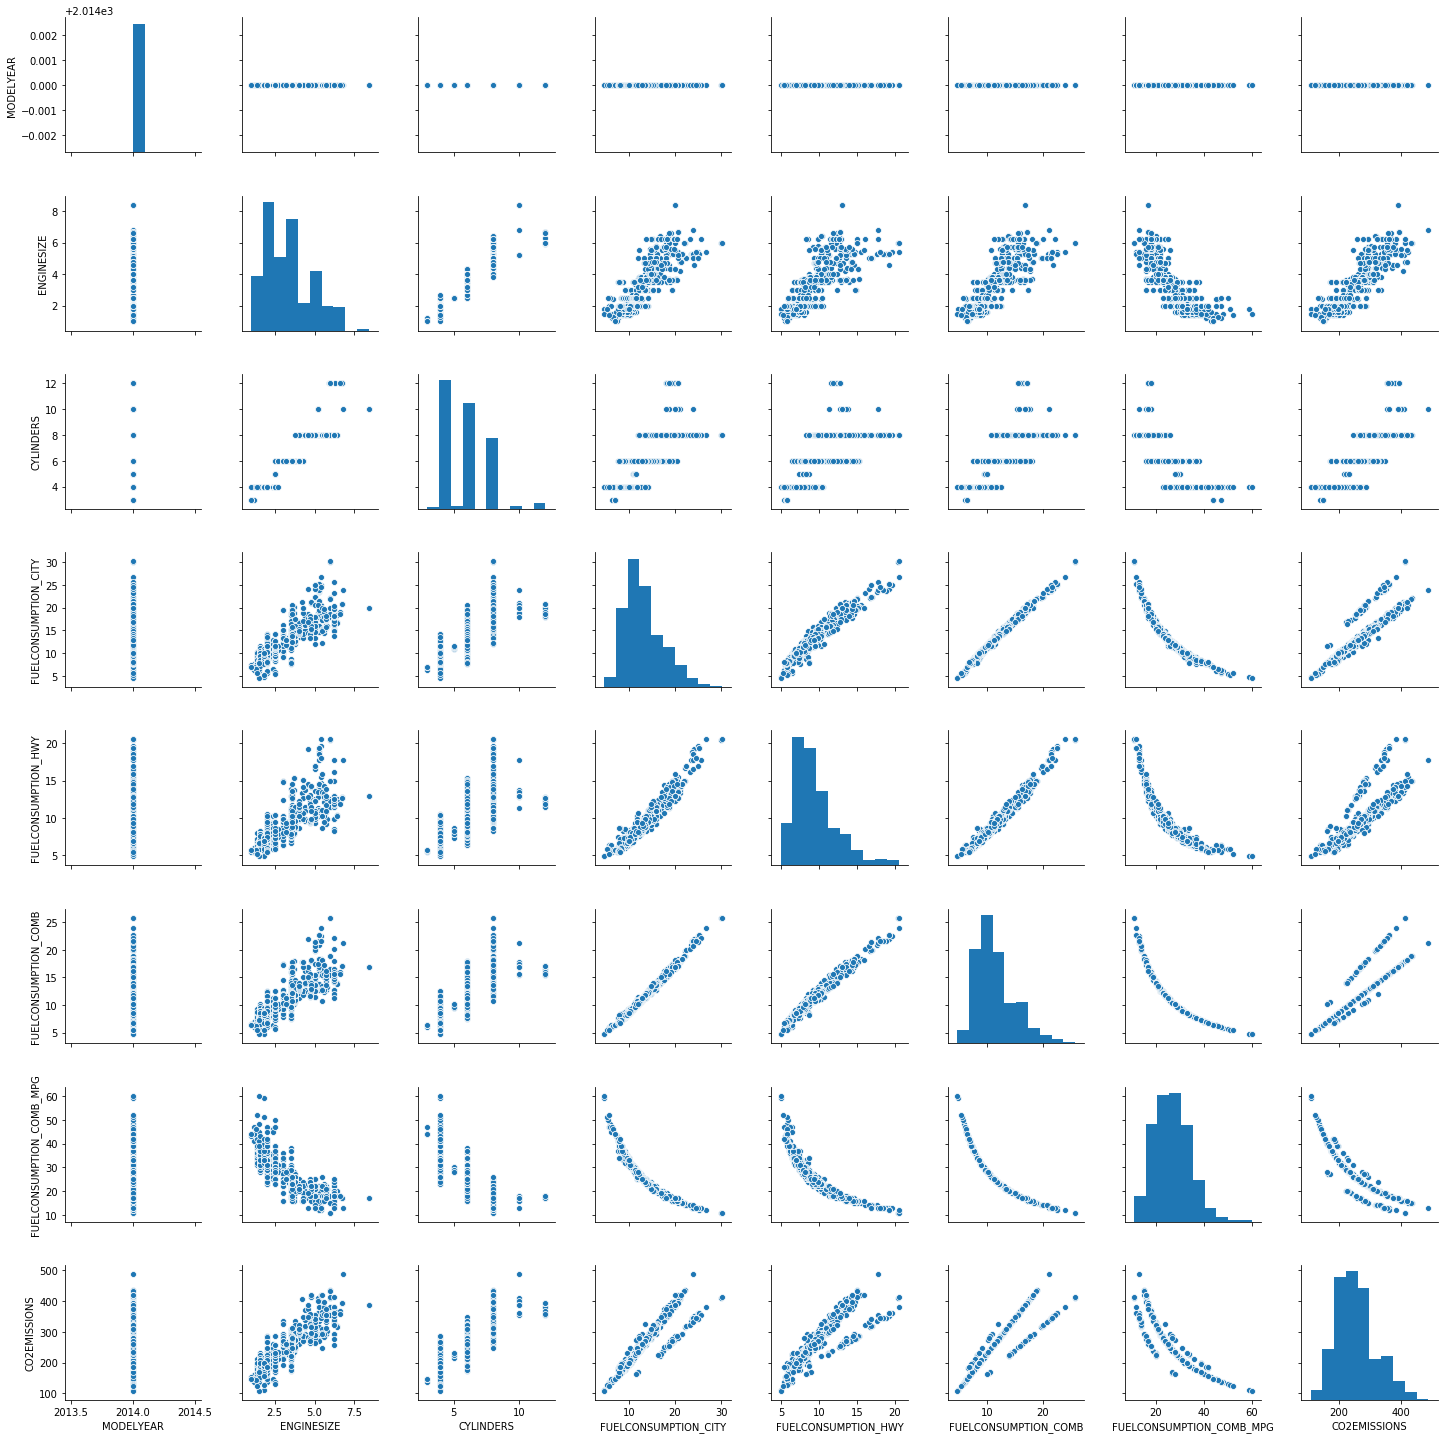

In [15]:
sns.pairplot(traindata)

In [28]:
reg = linear_model.LinearRegression()
X = np.asanyarray(traindata.iloc[:,[4,5,10,8,9]])
Y = np.asanyarray(traindata.iloc[:,12])
reg.fit(X,Y)
print("Coefficient : " , reg.coef_)
print("Intercept : " , reg.intercept_)

Coefficient :  [ 10.37843795   7.49235259  33.84415557 -12.42852788 -12.14166063]
Intercept :  65.58625201407182


In [32]:
reg.coef_[1]

7.492352590001392

In [40]:
yhat = reg.predict(testdata.iloc[:,[4,5,10,8,9]])
y = np.asanyarray(testdata.iloc[:,12])
x = np.asanyarray(testdata.iloc[:,[4,5,10,8,9]])

In [45]:
print("Residual Sum Of Squares: %.2f" % np.mean((y - yhat) **2))
print("Coefficient Of Determination: %.2f" % np.mean((y - yhat) **2))

Residual Sum Of Squares: 493.23
